In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Advertising.csv")

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
X = df.drop('sales',axis=1)

In [ ]:
y = df['sales']

## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

In [ ]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [ ]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [ ]:
poly_features[0][:3]

array([230.1,  37.8,  69.2])

In [ ]:
poly_features[0][:3]**2

array([52946.01,  1428.84,  4788.64])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

#Data Regularisation(L2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train[0]

array([ 1.53003874, -0.8862929 , -1.16598019,  1.93705409, -0.22476356,
       -0.62651363, -0.90793157, -0.850692  , -0.81317305])

In [ ]:
from sklearn.linear_model import RidgeCV
ridgeCv = RidgeCV(alphas = (0.1,1,3,10))
ridgeCv.fit(X_train,y_train)
ridgeCv.alpha_

0.1

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 0.1)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
prediction = ridge_model.predict(X_test)
prediction

array([17.20379564, 22.74576291, 20.39466028,  7.68339154, 24.39848339,
       12.62231119, 22.76362449,  8.1871436 , 12.13403065, 15.5792561 ,
        7.74066901,  8.1421529 , 11.93132277,  6.06817966, 10.49757796,
       12.28191927,  6.7834001 , 16.57875621, 10.57158033, 19.02386462,
       20.15078788, 13.84797101,  9.52893001, 22.10083104,  8.81686088,
        7.64132561, 22.35808309, 12.6102943 , 10.11498194,  6.09067061,
       11.65516178, 10.0777285 , 23.46364857,  9.8444954 , 15.38230434,
       21.06008648, 10.99409362, 20.18212487, 11.72693019,  6.4436853 ,
       10.69694097, 12.8094846 ,  9.21245947,  8.9207235 , 11.86416399,
        6.99267443,  9.9551003 , 14.67937626, 10.08759664, 11.2616187 ,
       14.04503519, 12.11986388,  8.97981222,  7.58871809,  8.38777959,
       10.84722568,  9.89867766, 25.27511723,  6.84376937, 11.93876269])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.9812286627443131

#REGULARISATION L1

In [ ]:
from sklearn.linear_model import LassoCV
lasso_model = LassoCV(eps = 0.001,n_alphas= 100, cv= 5)
lasso_model.fit(X_train,y_train)
y__pred = lasso_model.predict(X_test)
lasso_model.alpha_

0.0049245318064748715

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y__pred)

0.982558394791677

#Elastic Net(L1,L2)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
test_predictions = model.predict(X_test)
test_predictions

array([17.22263805, 22.76431942, 20.34240311,  7.63823081, 24.43070212,
       12.62670906, 22.77581025,  8.17257308, 12.1434595 , 15.59295774,
        7.70321153,  8.13970713, 11.94050296,  6.00239435, 10.52156294,
       12.29998882,  6.73498649, 16.59405075, 10.56966577, 19.02896977,
       20.15426466, 13.93688799,  9.49270709, 22.09007022,  8.81726594,
        7.63831359, 22.36845761, 12.63105172, 10.12142254,  6.02913868,
       11.66988463, 10.06960308, 23.4843312 ,  9.85934368, 15.33869793,
       21.07332794, 10.9676273 , 20.14554654, 11.74470764,  6.4231513 ,
       10.71450186, 12.83429003,  9.18959984,  8.91317752, 11.87160951,
        6.97626924,  9.95713385, 14.69620775, 10.1058211 , 11.2550714 ,
       14.04197399, 12.14298425,  8.96411937,  7.54429236,  8.39739662,
       10.86854626,  9.89471268, 25.23373739,  6.79877024, 11.96203194])

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

0.5905974833807957

In [ ]:
MSE

0.5231944949055349

In [ ]:
RMSE

0.7233218473857504

In [ ]:
df['sales'].mean()

14.0225

In [ ]:
train_rmse_errors = []
test_rmse_errors = []

for i in range(1,10):

    polynomial_converter = PolynomialFeatures(degree=i,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)
train_rmse_errors

[1.734594124329376,
 0.5879574085292232,
 0.43393443569020673,
 0.35170836883993495,
 0.2509342964085938,
 0.1992470718506088,
 5.421578379552841,
 0.1422460013426133,
 0.1681687270874676]

In [ ]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269274,
 0.5803286825236476,
 0.5077742639859423,
 2.5758223594965197,
 4.3144980064363825,
 1379.170980279306,
 4026.0387775053014,
 95039.05513950267]

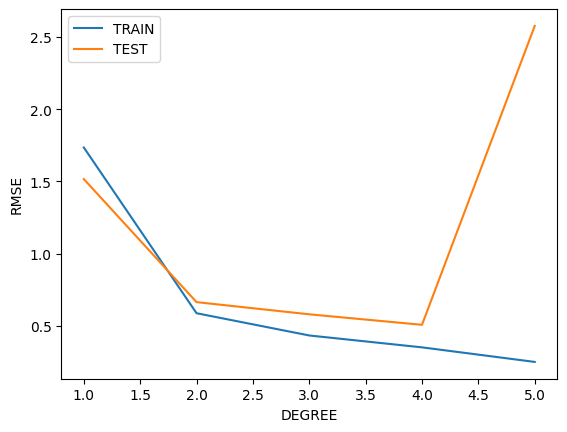

In [ ]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("DEGREE")
plt.ylabel("RMSE")
plt.legend()

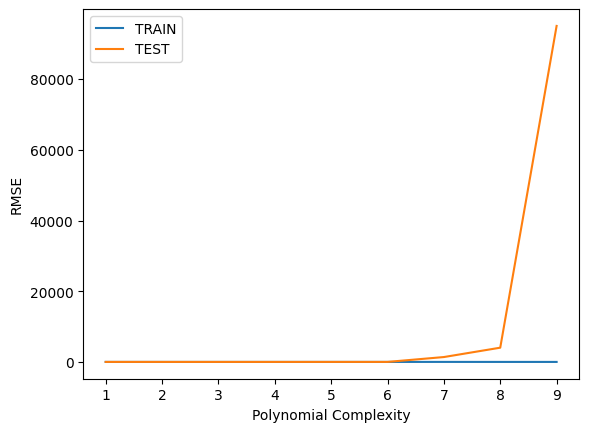

In [ ]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [ ]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [ ]:
final_model = LinearRegression()
featured_data = final_poly_converter.fit_transform(X)
final_model.fit(featured_data,y)

LinearRegression()

In [ ]:
from joblib import dump, load

In [ ]:
# name are given as i wish
dump(final_model, 'sales_poly_model.joblib') 
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

In [ ]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [ ]:
campaign = [[149,22,12]]

In [ ]:
campaign_poly = loaded_poly.transform(campaign)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
campaign_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [ ]:
final_model.predict(campaign_poly)

array([14.64501014])

-----
---